In [1]:
from preprocess import tseries
from model import model
from postprocess import forecast

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.style.use('seaborn-notebook')

In [4]:
# Monthly totals of US airline passengers from 1949 to 1960.
#    JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
y = np.array([
     112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
     115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
     145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
     171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
     196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
     204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
     242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
     284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
     315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
     340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
     360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
     417, 391, 419, 461, 472, 535, 622, 606, 508 ,461, 390, 432])

In [5]:
x = np.arange('1949-01', '1961-01', dtype='datetime64[M]')

In [6]:
series = tseries(y, x, season=12)

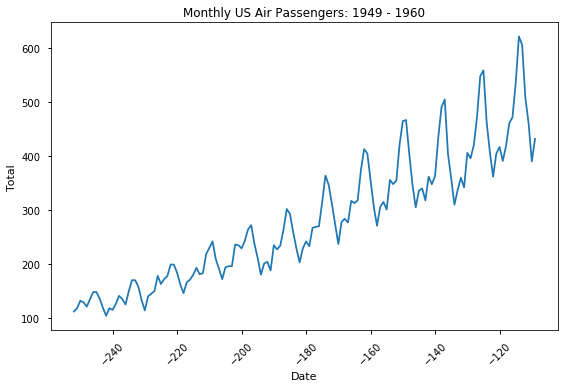

In [7]:
plt.show(series.plot_series_original(title='Monthly US Air Passengers: 1949 - 1960', y_lab='Total', x_lab='Date'))

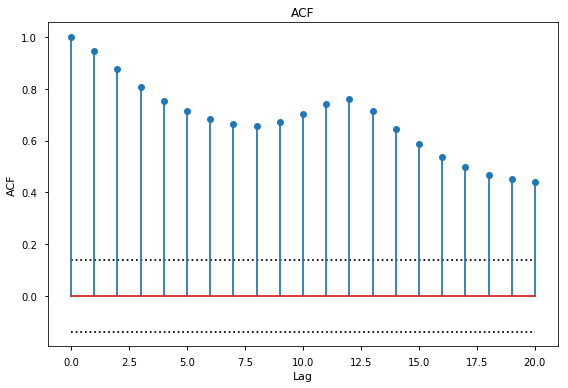

In [8]:
plt.show(series.plot_acf())

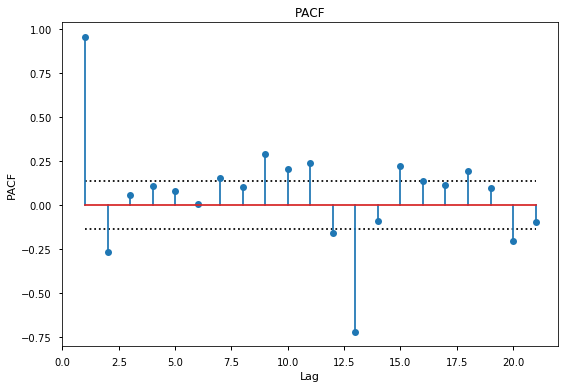

In [9]:
plt.show(series.plot_pacf())

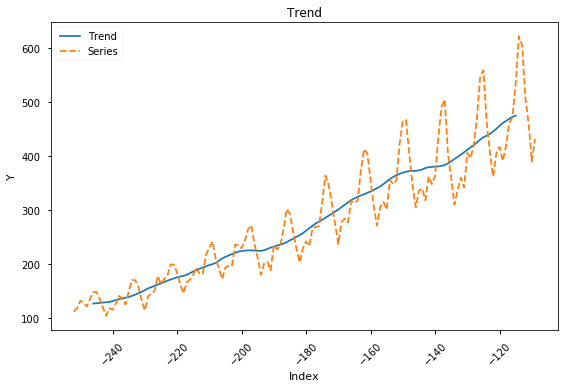

In [10]:
plt.show(series.plot_trend(overlay=True))

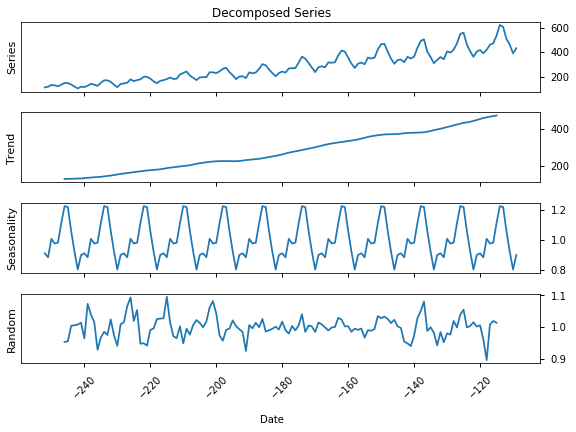

In [11]:
plt.show(series.plot_series_decomposition(x_lab='Date', model='multiplicative'))

In [12]:
forecast = model.naive_model(series, h=12, bootstrap=True, n_samples=5000, seasonal=True)

In [13]:
forecast.y_point

array([[417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]])

In [14]:
forecast.y_point.mean()

476.1666666666667

In [15]:
forecast.model_info['level']

array([0.95])

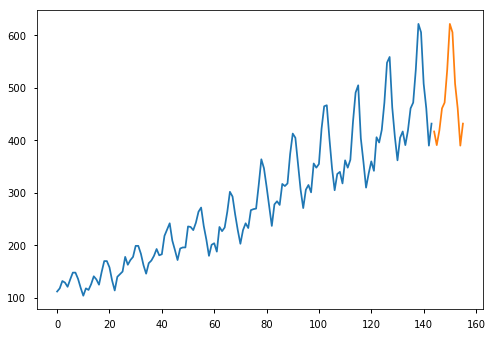

In [16]:
plt.plot(np.arange(len(forecast.y_original)), forecast.y_original)
plt.plot(np.arange(len(forecast.y_original), 156, 1), forecast.y_point)
plt.show()

In [17]:
y_train = tseries(y=y[:-12], date=x)
y_train.y_transformed

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.])

In [18]:
y_true = y[-12:]

In [19]:
forecast = model.drift_model(y_train, h=len(y_true), bootstrap=True, n_samples=5000)
forecast.y_point

array([[407.23664122],
       [409.47328244],
       [411.70992366],
       [413.94656489],
       [416.18320611],
       [418.41984733],
       [420.65648855],
       [422.89312977],
       [425.12977099],
       [427.36641221],
       [429.60305344],
       [431.83969466]])

In [20]:
forecast.accuracy(y_true, ['RMSE', 'MAE'])

array([[93.83961305],
       [67.70229008]])

In [21]:
model.drift_model(y_train, h=len(y_true), bootstrap=True, n_samples=5000).accuracy(y_true, ['RMSE', 'MAE'])

array([[93.83961305],
       [67.70229008]])

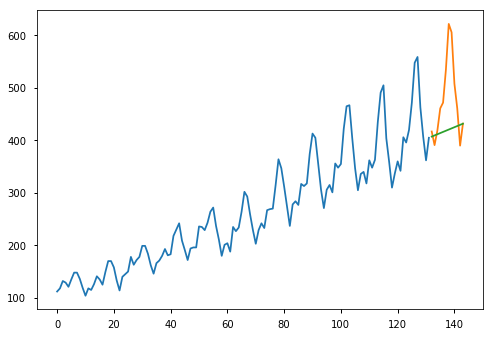

In [22]:
y_train_len = len(y_train.y_transformed)
y_true_len = len(y_true)
stacked_results = np.hstack((forecast.y_lb, forecast.y_point, forecast.y_ub))
plt.plot(np.arange(0, y_train_len, 1), forecast.y_original)
plt.plot(np.arange(y_train_len, y_train_len + y_true_len, 1), y_true)
plt.plot(np.arange(y_train_len, y_train_len + y_true_len, 1), stacked_results[:, 1])
plt.show()